In [45]:
#Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE

import os
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [2]:
# Set Random Value
SEED = 5000

In [3]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load the dataset
df_secom = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-UW/DS-Playground/master/secom.csv',sep = " ")
df_secom.head()

,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,NaN.38,NaN.39,0.5005,0.0118,0.0035,2.363,NaN.40,NaN.41,NaN.42,NaN.43
0,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
2,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
3,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
4,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077


In [5]:
#Load the first dataset with column names
url = "https://raw.githubusercontent.com/PriyaVj-UW/DS-Playground/master/secom.csv"
names = ["features" + str(x) for x in range(1,591)]
df_secom = pd.read_csv(url,sep=" ",names = names, na_values = "Nan")


In [6]:
df_secom.head()

,features1,features2,features3,features4,features5,features6,features7,features8,features9,features10,...,features581,features582,features583,features584,features585,features586,features587,features588,features589,features590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [7]:
#load teh second dataset with column names
url_1 = "https://raw.githubusercontent.com/PriyaVj-UW/DS-Playground/master/secom_labels.csv"
secom_labels = pd.read_csv(url_1,sep = " ",names = ["classification","date"],parse_dates = ["date"],na_values = "Nan")
secom_labels.head()

,classification,date
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00


In [8]:
#Merge two datasets
secom_merged = pd.merge(df_secom,secom_labels,left_index = True,right_index = True)
secom_merged.head()

,features1,features2,features3,features4,features5,features6,features7,features8,features9,features10,...,features583,features584,features585,features586,features587,features588,features589,features590,classification,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


In [9]:
secom_merged.drop('date',axis = 1,inplace = True)

In [10]:
secom_merged['classification'].value_counts()

-1    1463
 1     104
Name: classification, dtype: int64

In [11]:
secom_merged.isnull().sum()

features1          6
features2          7
features3         14
features4         14
features5         14
                  ..
features587        1
features588        1
features589        1
features590        1
classification     0
Length: 591, dtype: int64

In [12]:
featuresNullCount = secom_merged.isnull().sum()
#print (featuresNullCount)
print(featuresNullCount.keys())
print(featuresNullCount.values)

Index(['features1', 'features2', 'features3', 'features4', 'features5',
       'features6', 'features7', 'features8', 'features9', 'features10',
       ...
       'features582', 'features583', 'features584', 'features585',
       'features586', 'features587', 'features588', 'features589',
       'features590', 'classification'],
      dtype='object', length=591)
[   6    7   14   14   14   14   14    9    2    2    2    2    2    3
    3    3    3    3    3   10    0    2    2    2    2    2    2    2
    2    2    2    2    1    1    1    1    1    1    1    1   24   24
    1    1    1    1    1    1    1    1    1    1    1    4    4    4
    4    4    4    7    6    6    6    7    7    7    6    6    6    6
    6    6  794  794    6   24   24   24   24   24   24   24   24    1
   12 1341    0    0    0   51   51    6    2    2    6    6    6    6
    6    6    6    6    6    2    2    6    6    6    6 1018 1018 1018
  715    0    0    0    0    0   24    0    0    9    9    9    9  

In [13]:
colsWithNanValues = []
for i in featuresNullCount.keys():
    if(featuresNullCount[i]> 1000):
        print(i,featuresNullCount[i])
        colsWithNanValues.append(i)
    


features86 1341
features110 1018
features111 1018
features112 1018
features158 1429
features159 1429
features221 1341
features245 1018
features246 1018
features247 1018
features293 1429
features294 1429
features359 1341
features383 1018
features384 1018
features385 1018
features493 1341
features517 1018
features518 1018
features519 1018


In [14]:
print(colsWithNanValues)

['features86', 'features110', 'features111', 'features112', 'features158', 'features159', 'features221', 'features245', 'features246', 'features247', 'features293', 'features294', 'features359', 'features383', 'features384', 'features385', 'features493', 'features517', 'features518', 'features519']


In [15]:
secom_merged.drop(colsWithNanValues,axis = 1,inplace = True)

In [16]:
secom_merged.shape

(1567, 571)

In [17]:
secom_merged = secom_merged.apply(lambda x: x.fillna(x.mean()))

In [18]:
secom_merged.isnull().sum()

features1         0
features2         0
features3         0
features4         0
features5         0
                 ..
features587       0
features588       0
features589       0
features590       0
classification    0
Length: 571, dtype: int64

### Data Split

In [19]:
# seperate train, tune and Test set
secom_merged_train,secom_merged_tune_test = train_test_split(secom_merged,test_size = 0.2,
                               random_state = SEED,
                               shuffle = True,
                               stratify = secom_merged['classification'])

In [20]:
secom_merged_tune, secom_merged_test = train_test_split(secom_merged_tune_test,
                                                       test_size = 0.5,
                                                       random_state = SEED,
                                                       shuffle = True,
                                                       stratify = None)

In [21]:
print(secom_merged.shape)
print(secom_merged_train.shape)
print(secom_merged_tune.shape)
print(secom_merged_test.shape)

(1567, 571)
(1253, 571)
(157, 571)
(157, 571)


### Feature Scaling

In [22]:
sc = StandardScaler()
sc.fit(secom_merged_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
secom_merged.dtypes

features1         float64
features2         float64
features3         float64
features4         float64
features5         float64
                   ...   
features587       float64
features588       float64
features589       float64
features590       float64
classification      int64
Length: 571, dtype: object

In [24]:
y_train = secom_merged_train['classification'].to_numpy()
y_tune = secom_merged_tune['classification'].to_numpy()
y_test = secom_merged_test['classification'].to_numpy()


In [25]:
secom_merged_train = secom_merged_train.drop(['classification'],axis = 1)
secom_merged_tune = secom_merged_tune.drop(['classification'],axis = 1)
secom_merged_test = secom_merged_test.drop(['classification'],axis = 1)

In [26]:
x_train = secom_merged_train.to_numpy()
x_tune = secom_merged_tune.to_numpy()
x_test = secom_merged_test.to_numpy()

In [27]:
feature_names = secom_merged_train.columns


### Mitigate class imbalance using SMOTE

In [28]:
smt = SMOTE(random_state=SEED)
print(smt)

x_train_res,y_train_res = smt.fit_resample(x_train,y_train)

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=5000, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')


In [29]:
print(x_train.shape)
print(x_train_res.shape)

print(y_train.shape)
print(y_train_res.shape)

(1253, 570)
(2340, 570)
(1253,)
(2340,)


In [30]:
print(pd.crosstab(y_train_res,"count"))


col_0  count
row_0       
-1      1170
 1      1170


### Decision Tree Model

In [31]:
tree = DecisionTreeClassifier(criterion="gini",max_depth=4)
tree.fit(x_train_res,y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
#Show Tree method to display the Tree
def show_tree(out_name, model, feature_names):
    dotfile = open(out_name + ".dot", "w")
    export_graphviz(model, out_file=dotfile, filled=True, rounded=True, feature_names=feature_names)
    dotfile.close()

    os.system("dot -Tpng {}.dot -o {}.png".format(out_name, out_name))

    return(Image(filename=out_name + ".png", width=500, height=500))

In [34]:
#show_tree(out_name="secom_tree", model=tree, feature_names=feature_names)

### Model Performance on Tune set


In [38]:
def metrics(modelName,x_tune,y_tune):
    y_tune_pred = modelName.predict(x_tune)
    cm = confusion_matrix(y_true=y_tune,y_pred=y_tune_pred)
    print(cm)
    
    accuracyScore = accuracy_score(y_true=y_tune,y_pred=y_tune_pred)
    print('Accuracy of tune set: ' + str(accuracyScore))
    
    #Draw ROC curve
    y_tune_prob = modelName.predict_proba(x_tune)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_tune,y_score=y_tune_prob)
    roc_auc = roc_auc_score(y_true=y_tune,y_score=y_tune_prob)    
    
    plt.plot(fpr, tpr, color="blue", label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
    plt.title("Receiver Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.show()
    
    #Classification Report
    print(classification_report(y_true=y_tune,y_pred=y_tune_pred))

[[111  33]
 [ 10   3]]
Accuracy of tune set: 0.7261146496815286


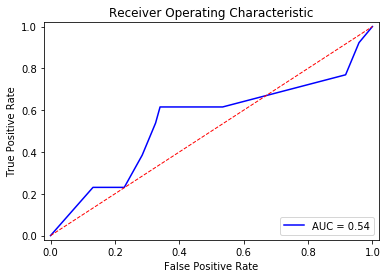

              precision    recall  f1-score   support

          -1       0.92      0.77      0.84       144
           1       0.08      0.23      0.12        13

    accuracy                           0.73       157
   macro avg       0.50      0.50      0.48       157
weighted avg       0.85      0.73      0.78       157



In [39]:
metrics(tree,x_tune,y_tune)

#### Logistic Regression Model

In [41]:
Logistic_Regression = LogisticRegression(random_state=SEED)
Logistic_Regression.fit(x_tune,y_tune)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5000, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[[144   0]
 [  0  13]]
Accuracy of tune set: 1.0


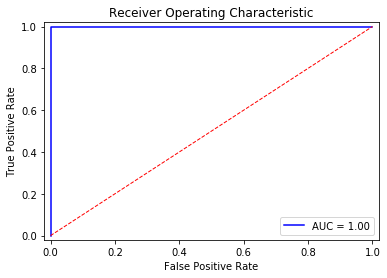

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       144
           1       1.00      1.00      1.00        13

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [43]:
metrics(Logistic_Regression,x_tune,y_tune)

### SVM Model

In [47]:
lsvc_lasso = LinearSVC(C=0.01,penalty="l1",dual = False)
lsvc_lasso.fit(x_tune,y_tune)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [49]:
y_tune_pred = lsvc_lasso.predict(x_tune)
cm = confusion_matrix(y_true=y_tune,y_pred=y_tune_pred)
print(cm)
    
accuracyScore = accuracy_score(y_true=y_tune,y_pred=y_tune_pred)
print('Accuracy of tune set: ' + str(accuracyScore))    
    
#Classification Report
print(classification_report(y_true=y_tune,y_pred=y_tune_pred))

[[144   0]
 [  1  12]]
Accuracy of tune set: 0.9936305732484076
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       144
           1       1.00      0.92      0.96        13

    accuracy                           0.99       157
   macro avg       1.00      0.96      0.98       157
weighted avg       0.99      0.99      0.99       157

